In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
df = pd.read_csv('./laptop_price.csv', encoding = 'latin-1')
df.sample(6)

laptop_ID Company            TypeName  Inches  \
605         612     MSI              Gaming    15.6   
389         395  Lenovo  2 in 1 Convertible    14.0   
1032       1046     MSI              Gaming    17.3   
961         975  Lenovo           Ultrabook    12.5   
958         972    Dell           Ultrabook    13.3   
1202       1220    Dell  2 in 1 Convertible    15.6   

                     ScreenResolution                          Cpu   Ram  \
605             4K Ultra HD 3840x2160  Intel Core i7 7700HQ 2.8GHz  16GB   
389             Touchscreen 2560x1440   Intel Core i7 7500U 2.7GHz  16GB   
1032                Full HD 1920x1080  Intel Core i7 7700HQ 2.8GHz   8GB   
961       IPS Panel Full HD 1920x1080   Intel Core i5 7300U 2.6GHz   8GB   
958                Quad HD+ 3200x1800   Intel Core i7 6500U 2.5GHz   8GB   
1202  Full HD / Touchscreen 1920x1080   Intel Core i7 8550U 1.8GHz  16GB   

                    Memory                      Gpu       OpSys  Weight  \
605   256GB SSD +  2TB HDD  Nvidia GeForce GTX 1060  Windows 10   1.8kg   
389              512GB SSD    Intel HD Graphics 620  Windows 10  1.42kg   
1032  128GB SSD +  1TB HDD  Nvidia GeForce GTX 1050  Windows 10   2.7kg   
961              256GB SSD    Intel HD Graphics 620  Windows 10  1.36kg   
958              256GB SSD    Intel HD Graphics 520  Windows 10   1.3kg   
1202             512GB SSD   Intel UHD Graphics 620  Windows 10     2kg   

      Price_euros  
605        2299.0  
389        2509.0  
1032       1191.8  
961        1760.0  
958        1268.0  
1202       1285.0

In [43]:
df.shape

(1303, 12)

This dataset contain 13 columns and 1303 rows.




In [44]:
df.duplicated().sum()

0

There are no duplicate values in this dataset.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


This dataset contain laptop_ID column. No need this column.




In [46]:
df.drop(columns = 'laptop_ID', axis = 1, inplace = True)
df.sample(3)

Company            TypeName  Inches  \
1261    Asus           Ultrabook    13.3   
234     Acer  2 in 1 Convertible    13.3   
726     Dell            Notebook    15.6   

                               ScreenResolution                         Cpu  \
1261                IPS Panel Full HD 1920x1080    Intel Core M 6Y30 0.9GHz   
234   IPS Panel Full HD / Touchscreen 1920x1080  Intel Core i5 6200U 2.3GHz   
726                           Full HD 1920x1080  Intel Core i5 8250U 1.6GHz   

      Ram                Memory                    Gpu       OpSys Weight  \
1261  8GB             512GB SSD  Intel HD Graphics 515  Windows 10  1.2kg   
234   8GB             256GB SSD  Intel HD Graphics 520  Windows 10  1.6kg   
726   8GB  128GB SSD +  1TB HDD         AMD Radeon 530  Windows 10  2.2kg   

      Price_euros  
1261        729.0  
234         689.0  
726         719.0

In [47]:
df.shape

(1303, 11)

In [48]:
df.describe()

Inches  Price_euros
count  1303.000000  1303.000000
mean     15.017191  1123.686992
std       1.426304   699.009043
min      10.100000   174.000000
25%      14.000000   599.000000
50%      15.600000   977.000000
75%      15.600000  1487.880000
max      18.400000  6099.000000

'Company' column.

In [49]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

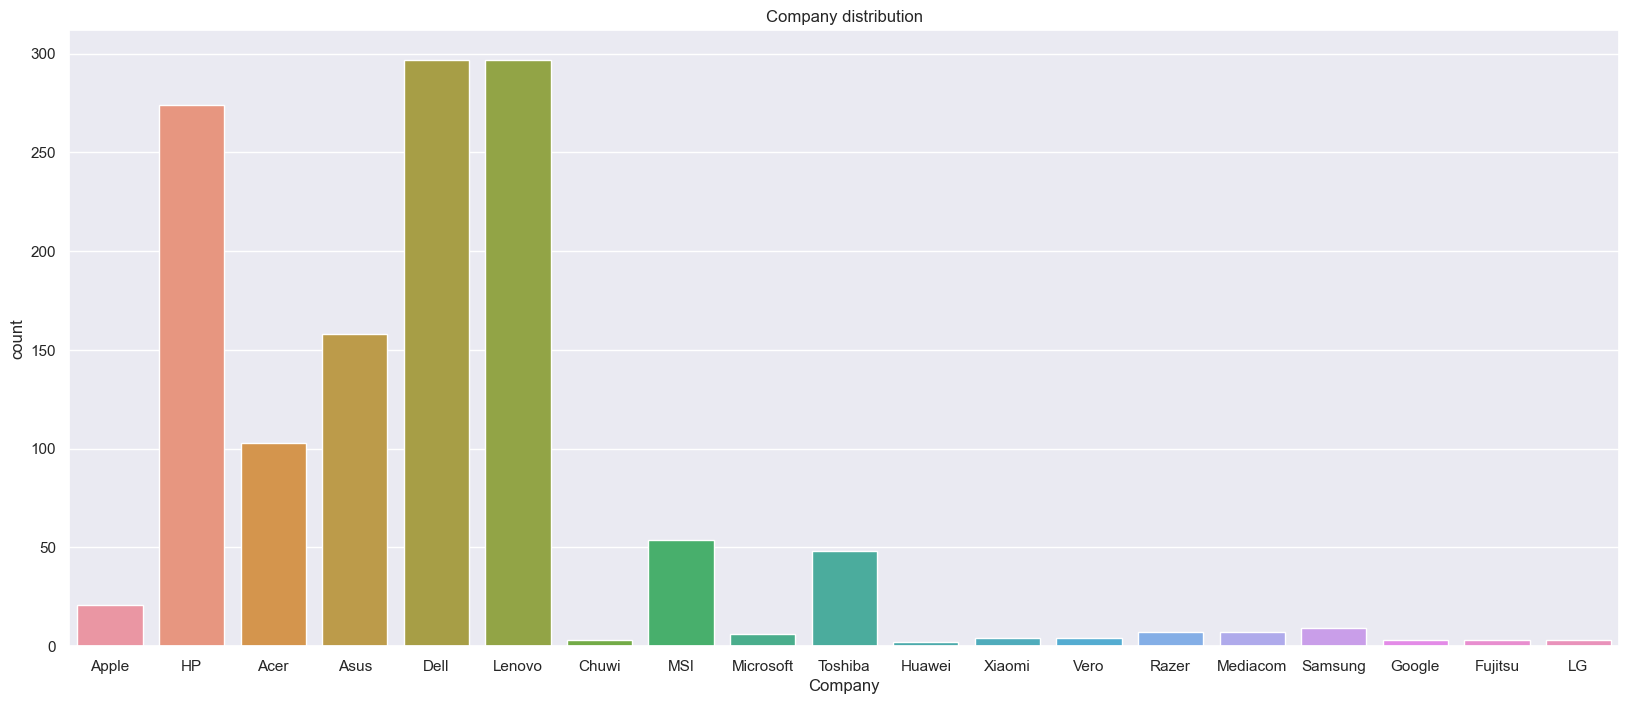

In [50]:
sns.set()
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Company', data = df)
plt.title('Company distribution')
plt.show()

In [51]:
df.replace({'Company' : {'Dell' : 1, 'Lenovo' : 2, 'HP' : 3, 'Asus' : 4, 'Acer' : 5, 'MSI' : 6, 'Toshiba' : 7, 'Apple' : 8, 'Samsung' : 9, 'Razer' : 10, 'Mediacom' : 11, 'Microsoft' : 12, 'Xiaomi' : 13, 'Vero' : 14, 'Chuwi' : 15, 'Google' : 17, 'Fujitsu' : 18, 'LG' : 19, 'Huawei' : 20}}, inplace = True)

In [52]:
df['Company'].value_counts()

1     297
2     297
3     274
4     158
5     103
6      54
7      48
8      21
9       9
10      7
11      7
12      6
13      4
14      4
15      3
17      3
18      3
19      3
20      2
Name: Company, dtype: int64

'TypeName' column.

In [53]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

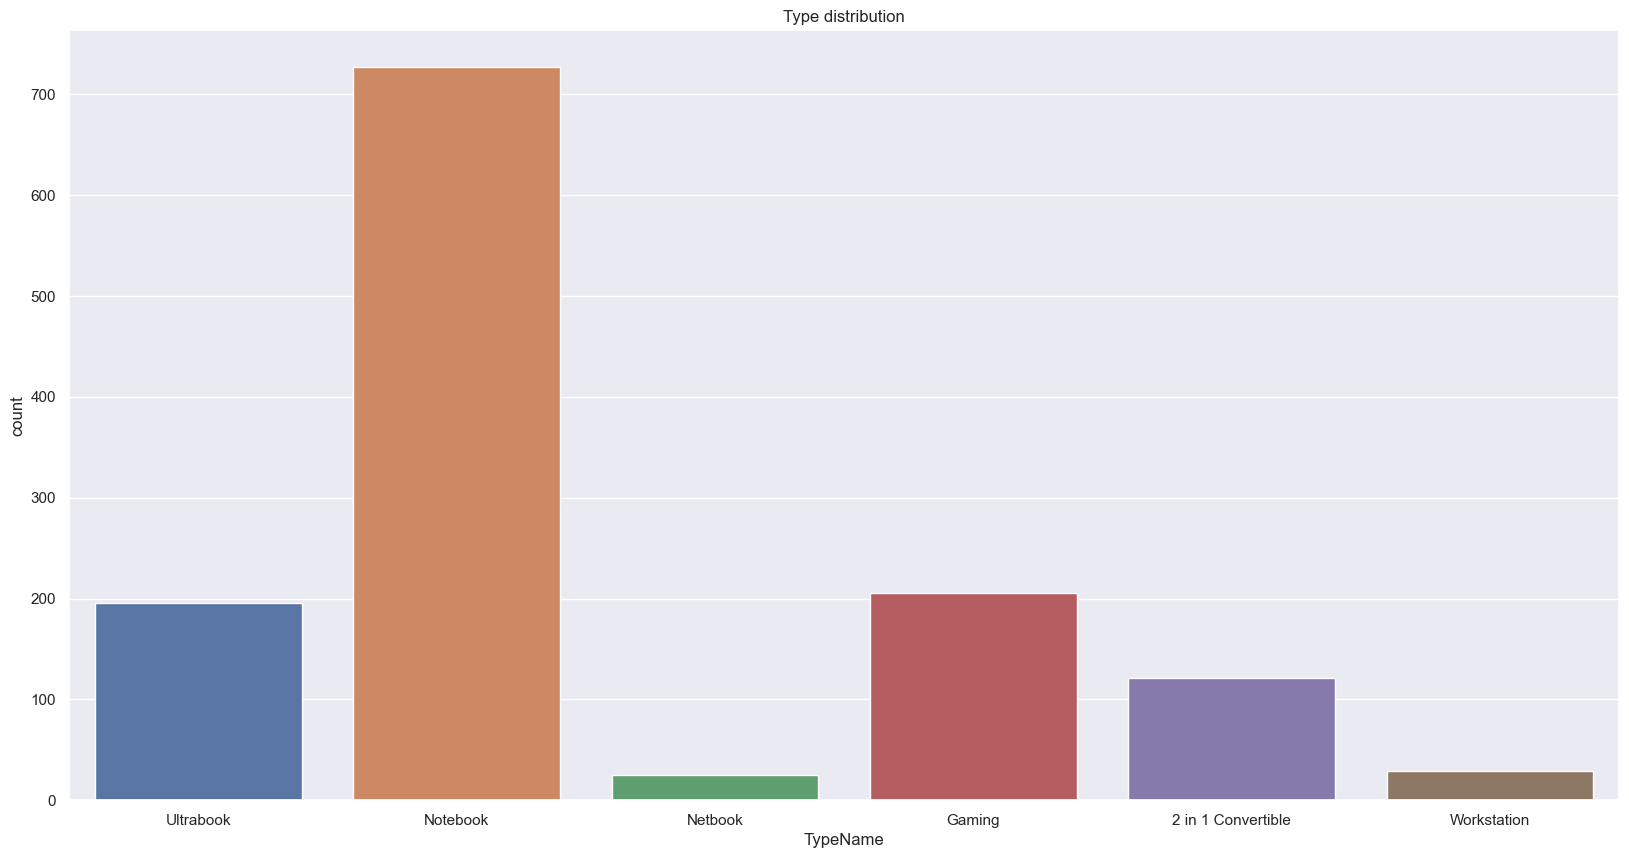

In [54]:
sns.set()
plt.figure(figsize = (20, 10))
sns.countplot(x = 'TypeName', data = df)
plt.title('Type distribution')
plt.show()

In [55]:
df.replace({'TypeName' : {'Notebook' : 1,
'Gaming' : 2, 
'Ultrabook' : 3,
'2 in 1 Convertible' : 4,
'Workstation' : 5,
'Netbook' : 6}}, inplace = True)

In [56]:
df['TypeName'].value_counts()

1    727
2    205
3    196
4    121
5     29
6     25
Name: TypeName, dtype: int64

'Inches' column.

In [57]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

<Figure size 2000x6000 with 0 Axes>

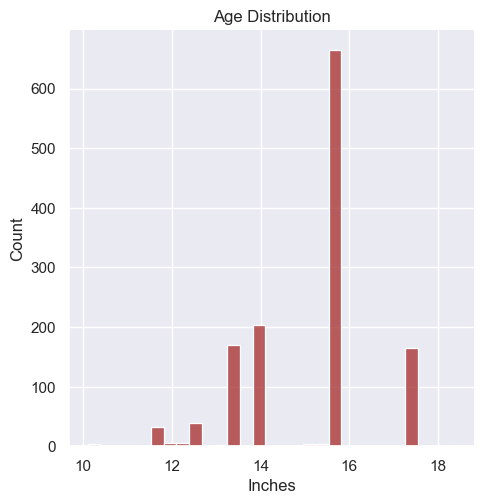

In [58]:
sns.set()
plt.figure(figsize = (20, 60))
sns.displot(df.Inches, color = 'brown')
plt.title('Age Distribution')
plt.show()

'ScreenResolution' column.

In [59]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [60]:
sns.set()
plt.figure(figsize = (200, 60))
sns.countplot(x = 'ScreenResolution', data = df)
plt.title('Screen resolution distribution')
plt.show()

In [61]:
df.replace({'ScreenResolution' : {'Full HD 1920x1080' : 1,
'1366x768'       : 2,
'IPS Panel Full HD 1920x1080'  : 3,
'IPS Panel Full HD / Touchscreen 1920x1080' : 4,
'Full HD / Touchscreen 1920x1080' : 5,
'1600x900'  : 6,
'Touchscreen 1366x768'   : 7,
'Quad HD+ / Touchscreen 3200x1800'  : 8,  
'IPS Panel 4K Ultra HD 3840x2160'  : 9,
'IPS Panel 4K Ultra HD / Touchscreen 3840x2160' : 10,
'4K Ultra HD / Touchscreen 3840x2160'  : 11,
'4K Ultra HD 3840x2160'  : 12,
'Touchscreen 2560x1440'  : 13,
'IPS Panel 1366x768'  : 14,
'IPS Panel Quad HD+ / Touchscreen 3200x1800'   : 15,
'IPS Panel Retina Display 2560x1600' : 16,
'IPS Panel Retina Display 2304x1440'  : 17,
'Touchscreen 2256x1504' :  18,
'IPS Panel Touchscreen 2560x1440' :  19,
'IPS Panel Retina Display 2880x1800' : 20,
'IPS Panel Touchscreen 1920x1200'  : 21,
'1440x900'  : 22,
'IPS Panel 2560x1440' : 23, 
'IPS Panel Quad HD+ 2560x1440'   : 24,
'Quad HD+ 3200x1800' : 25,
'1920x1080'   : 26,
'Touchscreen 2400x1600' : 27,
'2560x1440'  : 28,
'IPS Panel Touchscreen 1366x768' : 29,
'IPS Panel Touchscreen / 4K Ultra HD 3840x2160' : 30,
'IPS Panel Full HD 2160x1440' : 31,
'IPS Panel Quad HD+ 3200x1800'  : 32,
'IPS Panel Retina Display 2736x1824' : 33,
'IPS Panel Full HD 1920x1200' : 34,
'IPS Panel Full HD 2560x1440' : 35,
'IPS Panel Full HD 1366x768' : 36,
'Touchscreen / Full HD 1920x1080' : 37,
'Touchscreen / Quad HD+ 3200x1800' : 38,
'Touchscreen / 4K Ultra HD 3840x2160' : 39,
'IPS Panel Touchscreen 2400x1600 ': 40}}, inplace = True)

In [62]:
df['ScreenResolution'].value_counts()

1                                  507
2                                  281
3                                  230
4                                   53
5                                   47
6                                   23
7                                   16
8                                   15
9                                   12
10                                  11
11                                  10
12                                   7
13                                   7
14                                   7
15                                   6
16                                   6
17                                   6
18                                   6
19                                   5
20                                   4
21                                   4
22                                   4
23                                   4
24                                   3
25                                   3
26                       

'Cpu' column.

In [63]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [64]:
sns.set()
plt.figure(figsize = (400, 100))
sns.countplot(x = 'Cpu', data = df)
plt.title('Cpu')
plt.show()

'Ram' column.

In [65]:
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [66]:
df.replace({'Ram' : {'2GB' : '2', '4GB' : '4', '6GB' : '6','8GB' : '8','12GB' : '12','16GB' : '16', '24GB' : '24','32GB' : '32', '64GB' : '64'}},inplace = True)
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

In [67]:
df['Ram'] = df['Ram'].astype('int')

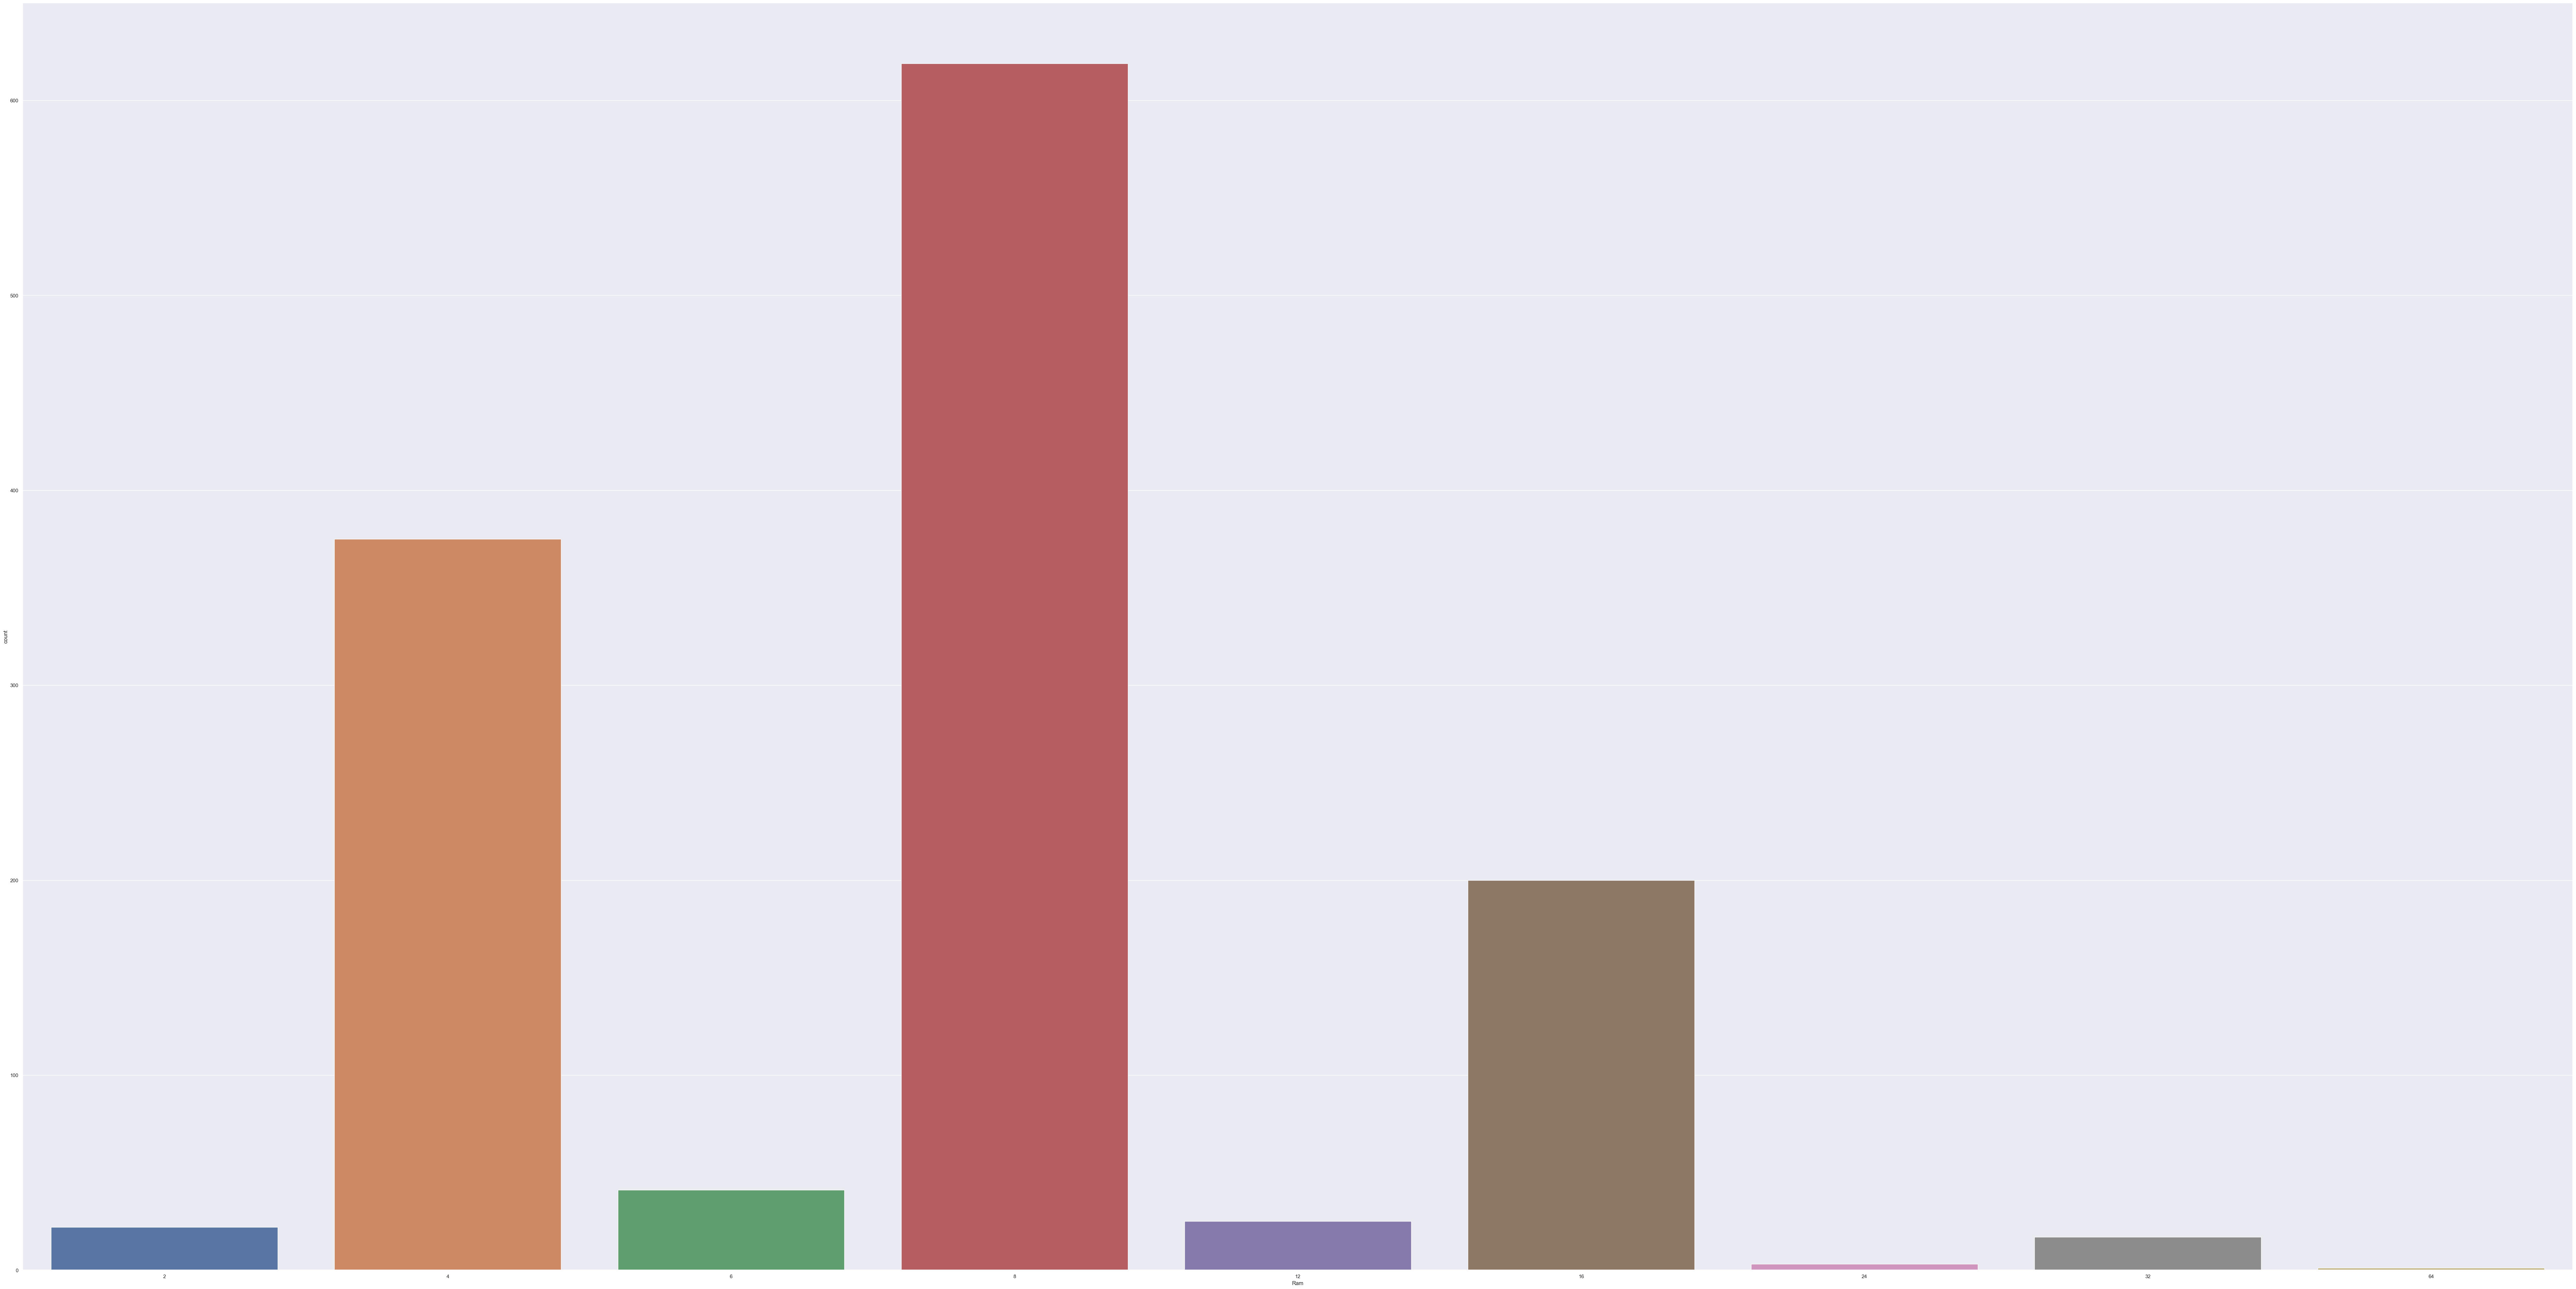

In [68]:
sns.set()
plt.figure(figsize = (100, 50))
sns.countplot(x = 'Ram', data = df)
plt.show()

'Memory' column

In [69]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [70]:
df['Memory'] = df['Memory'].str.replace('1.0', '1')

C:\Users\pinil\AppData\Local\Temp\ipykernel_9628\1379554861.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Memory'] = df['Memory'].str.replace('1.0', '1')


In [71]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          224
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
1GB SSD                            5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [72]:
df['first'] = df['Memory'].str.split('+', expand = True)[0]
df['second'] = df['Memory'].str.split('+', expand = True)[1]
df.drop(columns = 'Memory', axis = 1, inplace = True)
df['first'].fillna('0', inplace = True)
df['second'].fillna('0', inplace = True)
df.sample(6)

Company  TypeName  Inches ScreenResolution  \
405         4         3    14.0                1   
415         1         1    15.6                1   
164         5         1    15.6                2   
379         5         1    15.6                1   
1239        2         1    13.3                3   
91          5         1    15.6                1   

                                       Cpu  Ram                      Gpu  \
405             Intel Core i7 7500U 2.7GHz    8    Intel HD Graphics 620   
415             Intel Core i5 7200U 2.5GHz    4       AMD Radeon R5 M430   
164   Intel Celeron Dual Core N3350 1.1GHz    4    Intel HD Graphics 500   
379            Intel Core i7 7700HQ 2.8GHz    8  Nvidia GeForce GTX 1050   
1239            Intel Core i7 7500U 2.7GHz   16    Intel HD Graphics 620   
91              Intel Core i7 8550U 1.8GHz    8     Nvidia GeForce MX150   

           OpSys  Weight  Price_euros      first second  
405   Windows 10  1.10kg       1873.0  512GB SSD      0  
415        Linux   2.3kg        598.9  256GB SSD      0  
164   Windows 10   2.1kg        348.0    1TB HDD      0  
379        Linux   2.4kg        846.0    1TB HDD      0  
1239  Windows 10   1.4kg       1499.0  512GB SSD      0  
91    Windows 10   2.2kg        689.0    1TB HDD      0

In [73]:
df['first'].value_counts()

256GB SSD              412
1TB HDD                224
500GB HDD              132
512GB SSD              118
128GB SSD               96
256GB SSD               88
128GB SSD               76
32GB Flash Storage      38
512GB SSD               20
2TB HDD                 16
64GB Flash Storage      15
1TB SSD                 14
1TB Hybrid               9
256GB Flash Storage      8
16GB Flash Storage       7
32GB SSD                 6
1GB SSD                  5
128GB Flash Storage      4
16GB SSD                 3
1TB SSD                  2
512GB Flash Storage      2
64GB SSD                 1
64GB Flash Storage       1
1TB HDD                  1
32GB HDD                 1
128GB HDD                1
240GB SSD                1
8GB SSD                  1
508GB Hybrid             1
Name: first, dtype: int64

In [74]:
df['primary'] = df['first'].str.split(' ', expand = True)[0]
df['secondary'] = df['first'].str.split(' ', expand = True)[1]
df['2'] = df['first'].str.split(' ', expand = True)[2]
df['3'] = df['first'].str.split(' ', expand = True)[3]

In [75]:
print(df['primary'].value_counts())
print('-------------------------------------------------------------------------------------------------------------------')
print(df['secondary'].value_counts())
print("-------------------------------------------------------------------------------------------------------------------")
print(df['2'].value_counts())
print("-------------------------------------------------------------------------------------------------------------------")
print(df['3'].value_counts())

256GB    508
1TB      250
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
16GB      10
1GB        5
240GB      1
8GB        1
508GB      1
Name: primary, dtype: int64
-------------------------------------------------------------------------------------------------------------------
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: secondary, dtype: int64
-------------------------------------------------------------------------------------------------------------------
           207
Storage     75
Name: 2, dtype: int64
-------------------------------------------------------------------------------------------------------------------
    1
Name: 3, dtype: int64


In [76]:
df['primaryMemory'] = df['primary'] + ' ' + df['secondary']
df['primaryMemory'].value_counts()

256GB SSD       500
1TB HDD         225
128GB SSD       172
512GB SSD       138
500GB HDD       132
32GB Flash       38
64GB Flash       16
2TB HDD          16
1TB SSD          16
1TB Hybrid        9
256GB Flash       8
16GB Flash        7
32GB SSD          6
1GB SSD           5
128GB Flash       4
16GB SSD          3
512GB Flash       2
240GB SSD         1
8GB SSD           1
64GB SSD          1
128GB HDD         1
32GB HDD          1
508GB Hybrid      1
Name: primaryMemory, dtype: int64

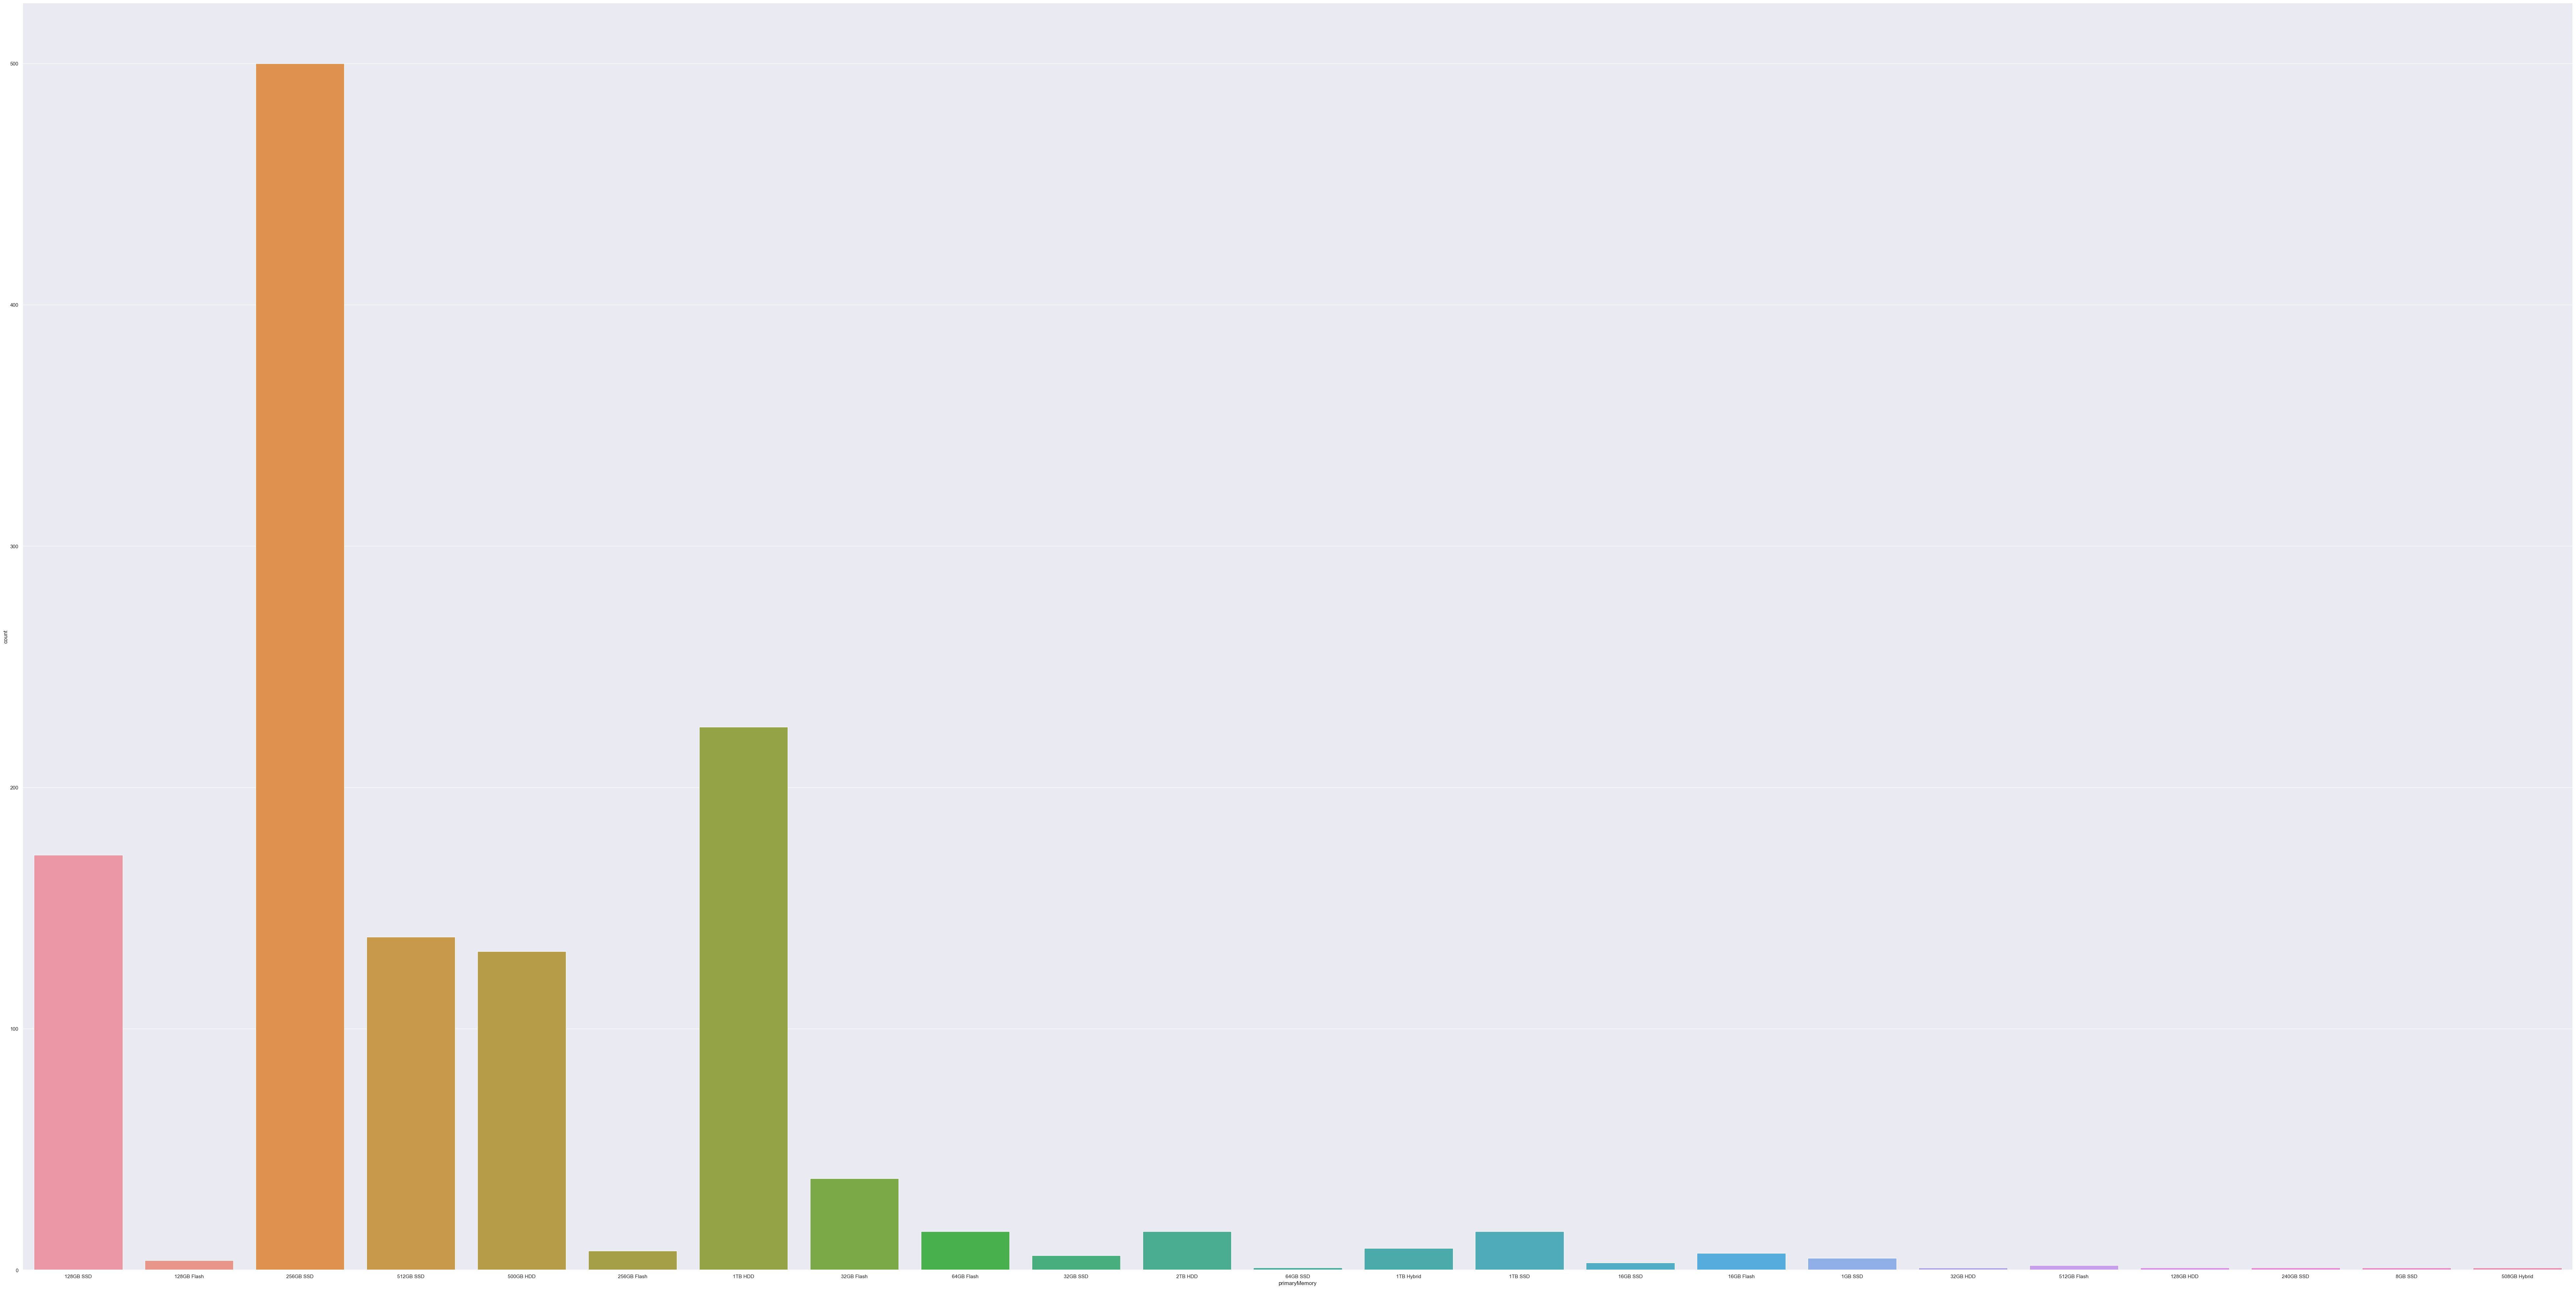

In [77]:
sns.set()
plt.figure(figsize = (100, 50))
sns.countplot(x = 'primaryMemory', data = df)
plt.show()

In [78]:
df['SecondaryMemory'] = df['second']

In [79]:
df['SecondaryMemory'].value_counts()

0               1095
  1TB HDD        185
  2TB HDD         15
  256GB SSD        3
  500GB HDD        2
  1TB Hybrid       2
  512GB SSD        1
Name: SecondaryMemory, dtype: int64

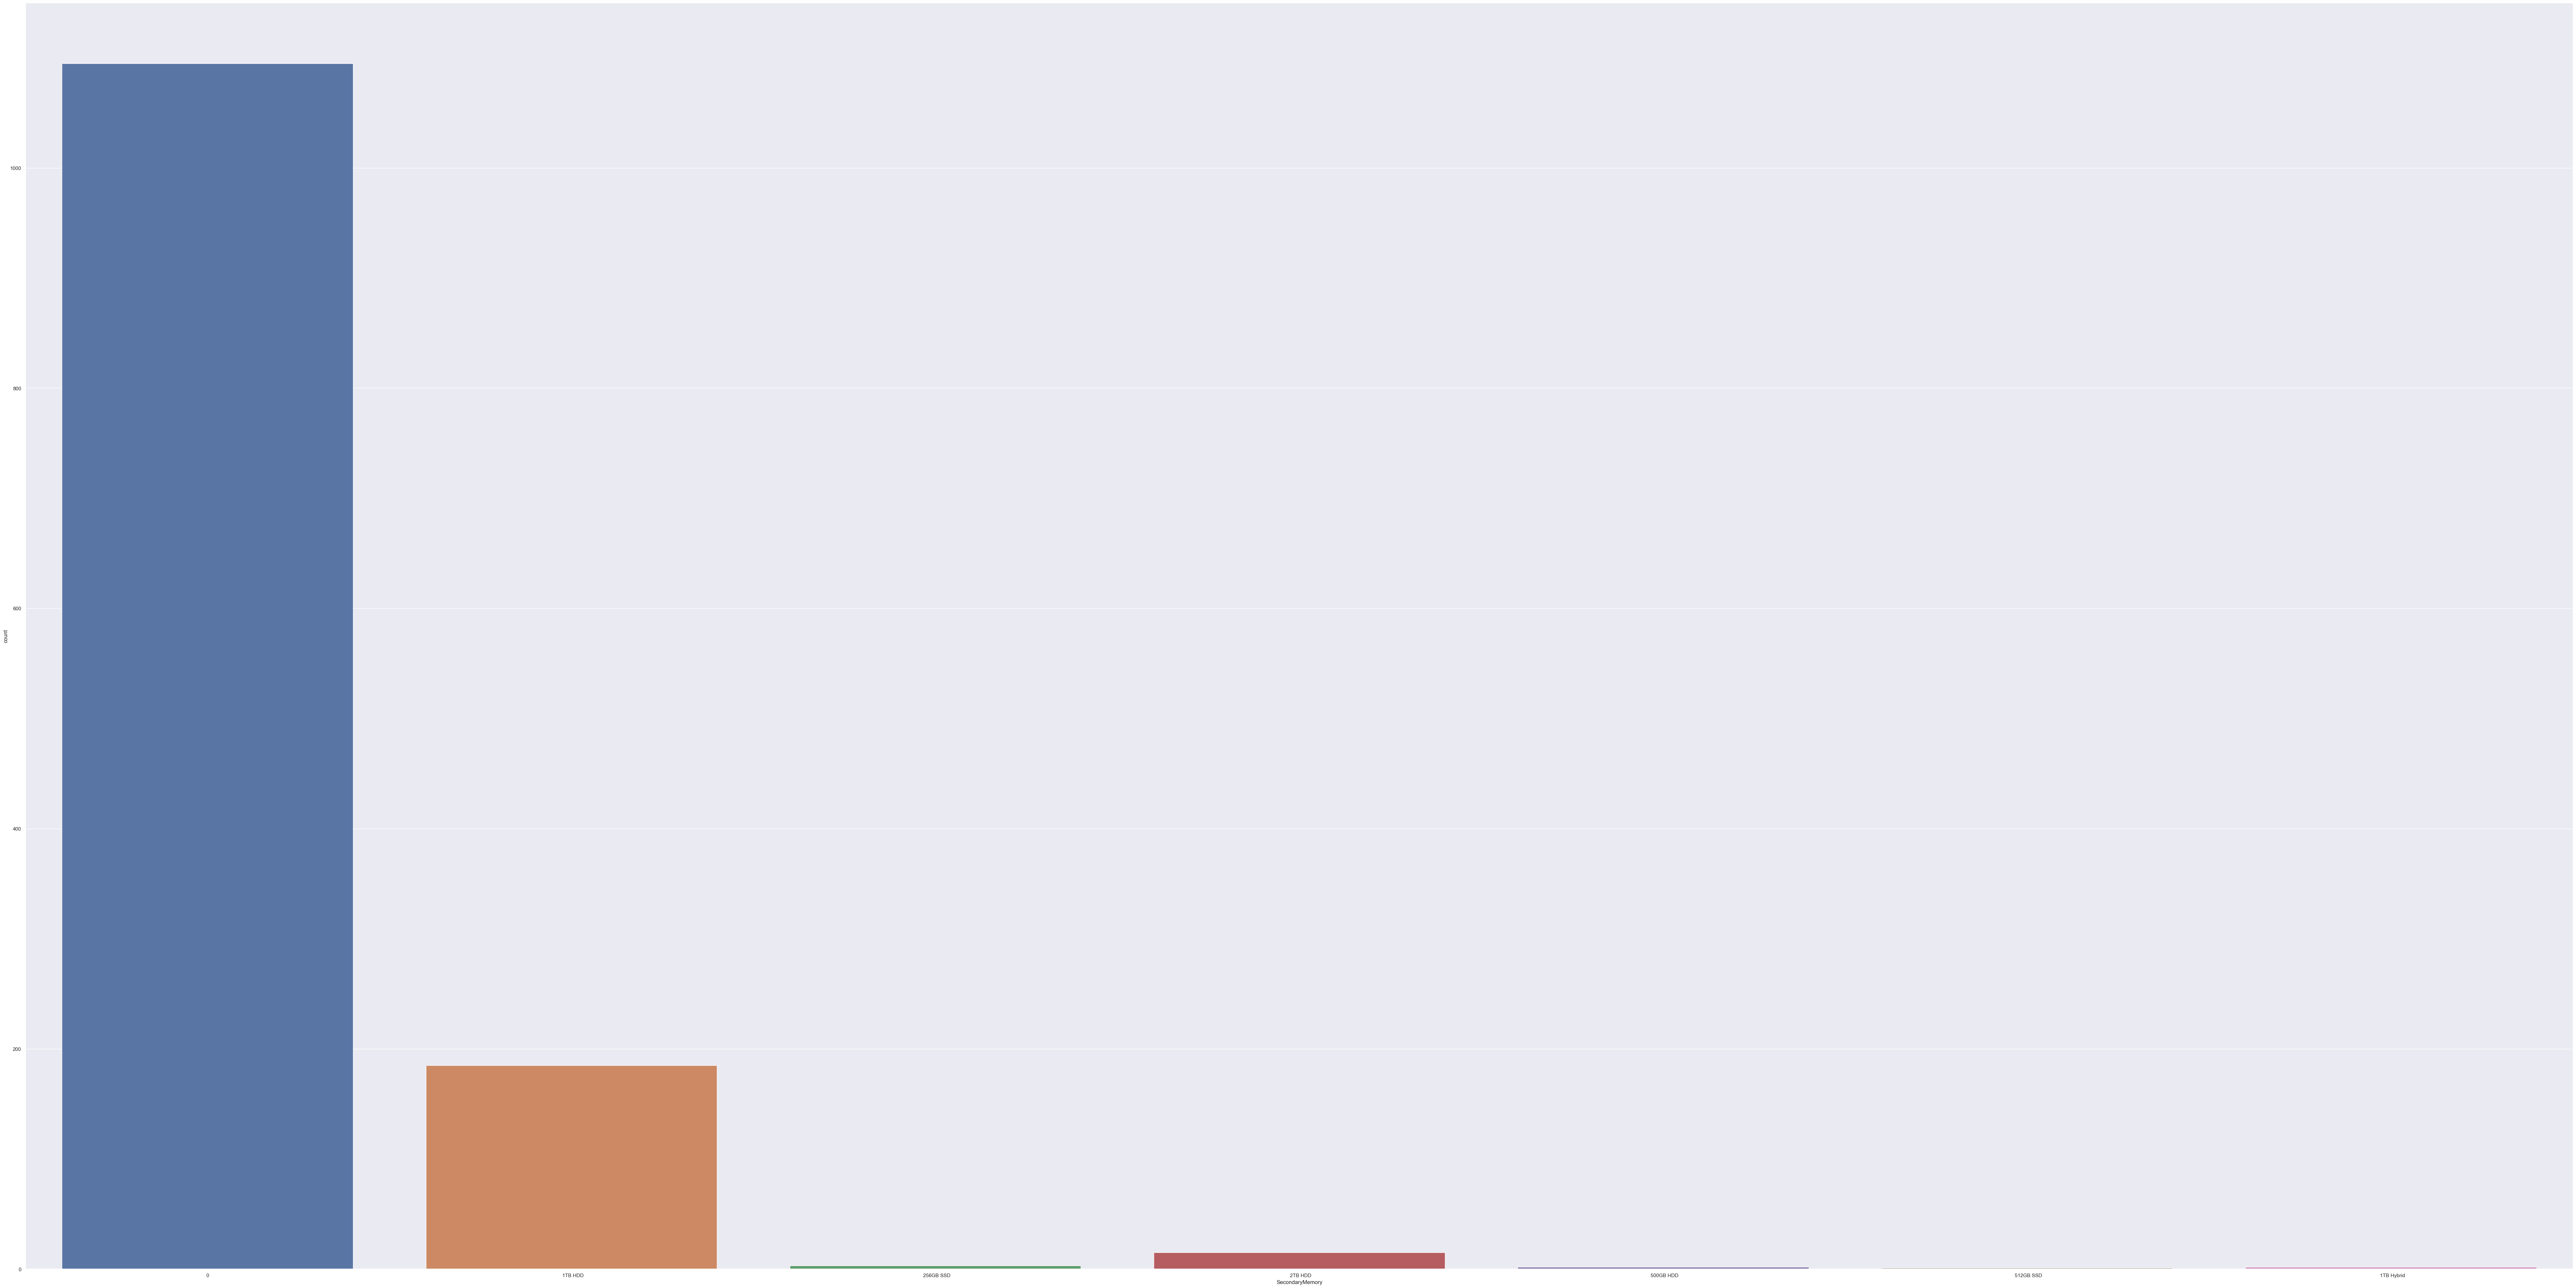

In [80]:
sns.set()
plt.figure(figsize = (100, 50))
sns.countplot(x = 'SecondaryMemory', data = df)
plt.show()

In [81]:
df.sample(3)

Company  TypeName  Inches ScreenResolution                         Cpu  \
489         4         3    12.5                1  Intel Core i7 7500U 2.7GHz   
1297        4         1    15.6                2  Intel Core i7 6500U 2.5GHz   
13          1         1    15.6                1    Intel Core i3 6006U 2GHz   

      Ram                    Gpu       OpSys  Weight  Price_euros      first  \
489    16  Intel HD Graphics 620  Windows 10  0.91kg      1950.00  512GB SSD   
1297    4    Nvidia GeForce 920M  Windows 10   2.2kg       720.32  500GB HDD   
13      4     AMD Radeon R5 M430  Windows 10   2.2kg       498.90  256GB SSD   

     second primary secondary     2     3 primaryMemory SecondaryMemory  
489       0   512GB       SSD  None  None     512GB SSD               0  
1297      0   500GB       HDD  None  None     500GB HDD               0  
13        0   256GB       SSD  None  None     256GB SSD               0

In [82]:
df.drop(columns = ['first', 'second', 'primary', 'secondary', '2', '3'], axis = 1, inplace = True)

In [83]:
df.sample()

Company  TypeName  Inches ScreenResolution                         Cpu  \
777        5         1    14.0                3  Intel Core i3 7100U 2.4GHz   

     Ram                    Gpu       OpSys Weight  Price_euros primaryMemory  \
777    4  Intel HD Graphics 620  Windows 10  1.8kg        636.0     128GB SSD   

    SecondaryMemory  
777               0

'Gpu' column.

In [84]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [85]:
sns.set()
plt.figure(figsize = (500, 150))
sns.countplot(x = 'Gpu', data = df)
plt.show()

'OpSys' column.

In [86]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

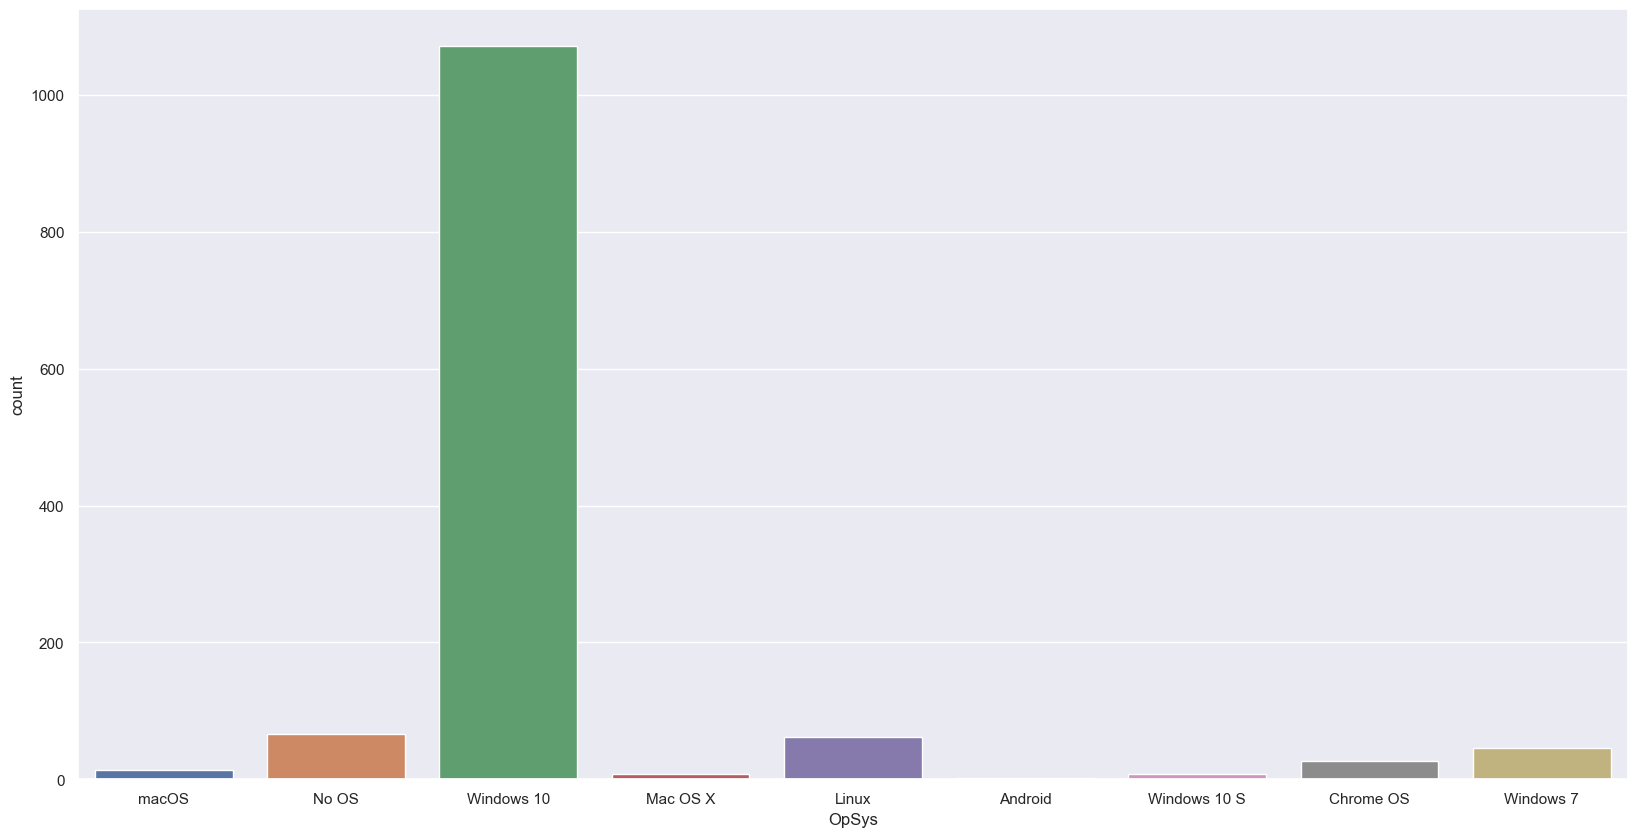

In [87]:
sns.set()
plt.figure(figsize = (20, 10))
sns.countplot(x = 'OpSys', data = df)
plt.show()

In [39]:
df.replace({'OpSys' :{'Windows 10' : 1,
'No OS' : 2,
'Linux' : 3,
'Windows 7' :  4,
'Chrome OS' : 5,
'macOS' : 6,
'Mac OS X' : 7,
'Windows 10 S' : 8,
'Android' : 9 }}, inplace = True)

In [40]:
df['OpSys'].value_counts()

1    1072
2      66
3      62
4      45
5      27
6      13
7       8
8       8
9       2
Name: OpSys, dtype: int64